# PyTorch Computer Vision:

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer Vision Libraries In PyTorch:

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision) - Base domain library for PyTorch computer vision
* `torchvision.datasets` - Get datasets and data loading functions for computer vision here
* `torchvision.models` - Get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - Functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.10.0+cu128
0.25.0+cu128


## 1. Getting A Dataset:

The dataset we'll be using is FashionMNIST from torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST. MNIST = Modified National Institute of Standards and Technology; their database is the "Hello World" of machine learning and computer vision. Most experts thought that the MNIST dataset of hand-written numbers was too easy as computer vision algorithms evolved, so the FashionMNIST dataset was created to make it harder.

In [2]:
# Set up training data
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to?
    train = True, # Do we want the training dataset?
    download = True, # Do we want to download yes/no?
    transform = ToTensor(), # How do we want to transform the data?
    target_transform = None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape of our image
print(f'Image shape: {image.shape} -> [color_channels, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2. Visualizing Our Data:

Image shape: torch.Size([1, 28, 28])


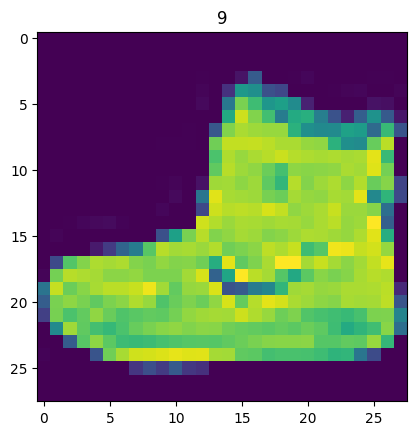

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label);

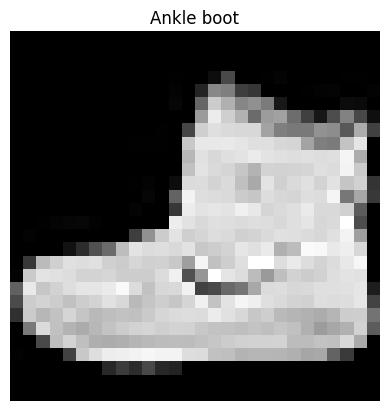

In [9]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);

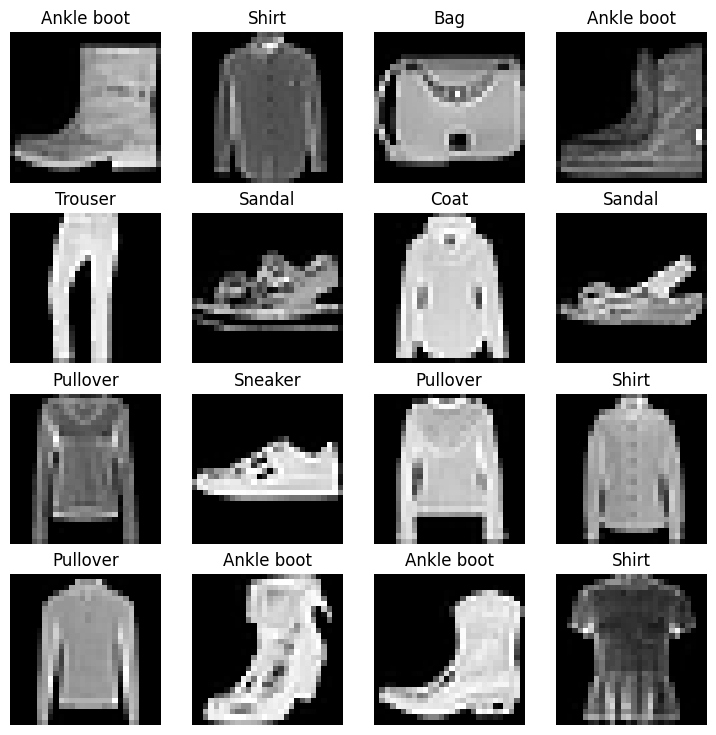

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);

Do you think tese items of clothing (images) could be modeled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader:

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a PyThon iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://youtu.be/l4lSUAcvHFs

In [11]:
from torch.utils.data import DataLoader

# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23f83fd03d0>,
 <torch.utils.data.dataloader.DataLoader at 0x23f851bdf10>)

In [12]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023F83FD03D0>, <torch.utils.data.dataloader.DataLoader object at 0x0000023F851BDF10>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [13]:
60000 / 32

1875.0

In [14]:
10000 / 32

312.5

In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


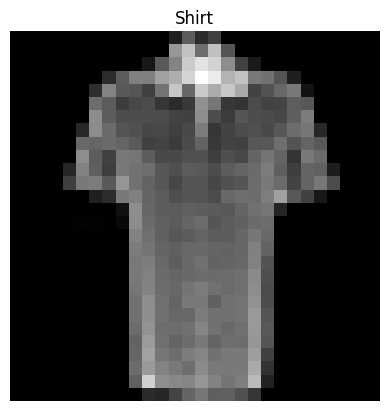

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0 - Building A Baseline Model:

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]


# Flatten the sample
output = flatten_model(x) # Perform forward pass

# Print out what happened
print(f'Shape before flattening: {x.shape} -> [color_channels, height, width]')
print(f'Shape after flattening: {output.shape} -> [color_channels, height * width]')

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # This is 28 * 28
    hidden_units = 10, # How many units in the hidden layer
    output_shape = len(class_names) # One for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1. Set Up Loss, Optimizer, And Evaluation Metrics:

* Loss function - Since we're wroking with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Our Optimizer `torch.optim.SGD` (stochastic gradient descent)
* Evaluation metric - Since we're working on a classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping download...')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2. Creating A Function To Time Our Experiments:

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """
    Prints difference between start and end time.
    """
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [25]:
start_time = timer()
### some code...
end_time = timer()
print_train_time(start = start_time, end = end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


3.719999949680641e-05

### 3.3. Creating A Training Loop And Training A Model On Batches Of Data:

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch} \n------')
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
        # Print out what's happening
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.')
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    # Print out what's happening
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

c:\Users\Jake\Documents\Udemy_Courses\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 33%|███▎      | 1/3 [00:20<00:40, 20.21s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 67%|██████▋   | 2/3 [00:38<00:19, 19.22s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2 
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


100%|██████████| 3/3 [00:56<00:00, 18.95s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 56.869 seconds


## 4. Make Predictions And Get Model 0 Results:

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y, in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name': model.__class__.__name__, # Only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

100%|██████████| 313/313 [00:01<00:00, 157.88it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Set Up Device-Agnostic Code (For Using A GPU If There Is One):

In [28]:
!nvidia-smi

Tue Jan 27 11:39:32 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 573.22                 Driver Version: 573.22         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   59C    P8              5W /   35W |    2935MiB /   4096MiB |     16%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
torch.cuda.is_available()

True

In [30]:
# Set up device-agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1 - Building A Better Model With Non-Linearity:

We learned about the power of non-linearity in notebook 02 - https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity

In [31]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [32]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, # This is the output of the flatten layer after our 28 * 28 image goes in
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device) # Send to the GPU if it's available
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1. Set Up Loss, Optimizer, And Evaluation Metrics:

In [33]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # Tries to update our model's parameters to reduce the loss
                            lr = 0.1)

### 6.2. Functionizing Training And Evaluation/Testing Loops:

Let's create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Performs a training step with model trying to learn on data_loader.
    """
    train_loss, train_acc = 0, 0
    model.to(device)
    
    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss
        train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_pred.argmax(dim = 1)) # Go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')

In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data loader."""
    test_loss, test_acc = 0, 0
    model.to(device)
    
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y,
                                 y_pred = test_pred.argmax(dim = 1)) # Go from logits -> prediction labels
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')

In [36]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------')
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:16<00:33, 16.73s/it]

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:34<00:17, 17.17s/it]

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:52<00:00, 17.39s/it]

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 52.181 seconds


**Note:** Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [37]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y, in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name': model.__class__.__name__, # Only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

In [38]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 165.63it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

## Model 2 = Building A Convolutional Neural Network (CNN):

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [39]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1), # Values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7 * 7, # There's a trick to calculating this; temporarily multiply by 0 to intentionally let the model error, then replace the 0 with the expected shape according to the error
                      out_features = output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2: {x.shape}')
        x = self.classifier(x)
        # print(f'Output shape of classifier: {x.shape}')
        return x

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [41]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [42]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0276, -0.0354,  0.0448, -0.0097, -0.0473,  0.0209,  0.0434, -0.0504,
          0.0213, -0.0634]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1. Stepping Through `nn.Conv2d()`:

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [43]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [44]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3, # Number of channels in the input image
                       out_channels = 64, # Number of channels produced by the convolution
                       kernel_size = (3, 3), # Size of the convolving kernel
                       stride = 1, # Stride of the convolution
                       padding = 0) # Padding added to all four sides of the input

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 64, 62, 62])

### 7.2. Stepping Through `nn.MaxPool2d()`:

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [45]:
# Print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 64, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 64, 31, 31])


In [46]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f'\nRandom pool tensor:\n {random_tensor}')
print(f'Random pool tensor shape: {random_tensor.shape}')

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


Random pool tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random pool tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3. Set Up A Loss Function And Optimizer For `model_2`:

In [47]:
# Set up loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### 7.4. Training And Testing `model_2` Using Our Training And Test Functions:

In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------')
    train_step(model = model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.52714 | Train acc: 81.02%


 33%|███▎      | 1/3 [00:21<00:43, 21.62s/it]

Test loss: 0.37232 | Test acc: 86.79%

Epoch: 1
-------
Train loss: 0.34495 | Train acc: 87.61%


 67%|██████▋   | 2/3 [00:42<00:21, 21.12s/it]

Test loss: 0.33343 | Test acc: 88.04%

Epoch: 2
-------
Train loss: 0.30977 | Train acc: 88.89%


100%|██████████| 3/3 [01:04<00:00, 21.38s/it]

Test loss: 0.30595 | Test acc: 89.04%

Train time on cuda: 64.155 seconds


In [49]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

100%|██████████| 313/313 [00:02<00:00, 120.05it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30595260858535767,
 'model_acc': 89.03753993610223}

## 8. Compare Model Results And Training Time:

In [50]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.305953,89.037540


In [51]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,56.869194
1,FashionMNISTModelV1,0.685001,75.019968,52.180630
2,FashionMNISTModelV2,0.305953,89.037540,64.155449


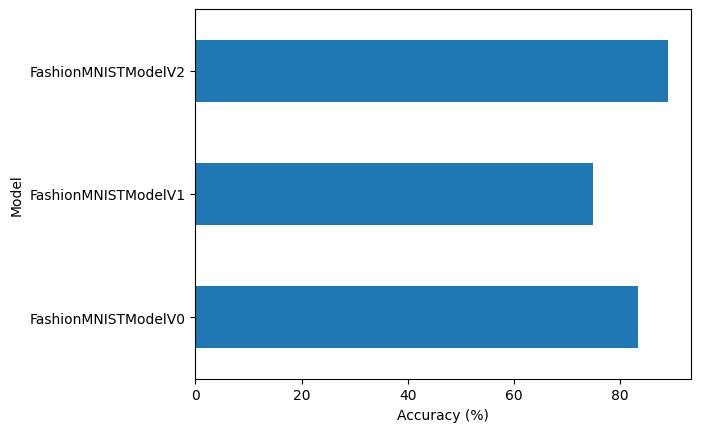

In [52]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind = 'barh')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model');

## 9. Make And Evaluate Random Predictions With Best Model:

In [53]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim = 0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [54]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

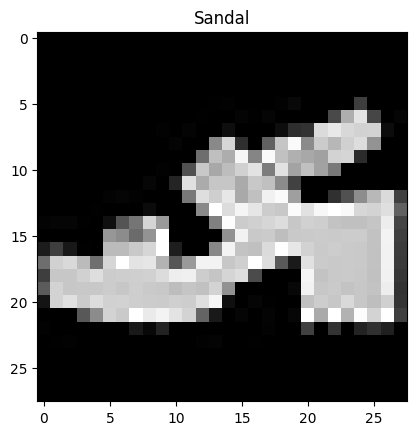

In [55]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [56]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[8.8261e-08, 1.1739e-09, 1.6042e-08, 1.3587e-08, 8.1817e-09, 9.9996e-01,
         2.2777e-06, 3.8455e-06, 6.0870e-07, 3.6690e-05],
        [1.1022e-01, 3.6618e-01, 2.7586e-03, 4.6797e-01, 2.1206e-02, 4.2733e-05,
         2.9587e-02, 1.3638e-03, 9.8122e-05, 5.7204e-04]])

In [57]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

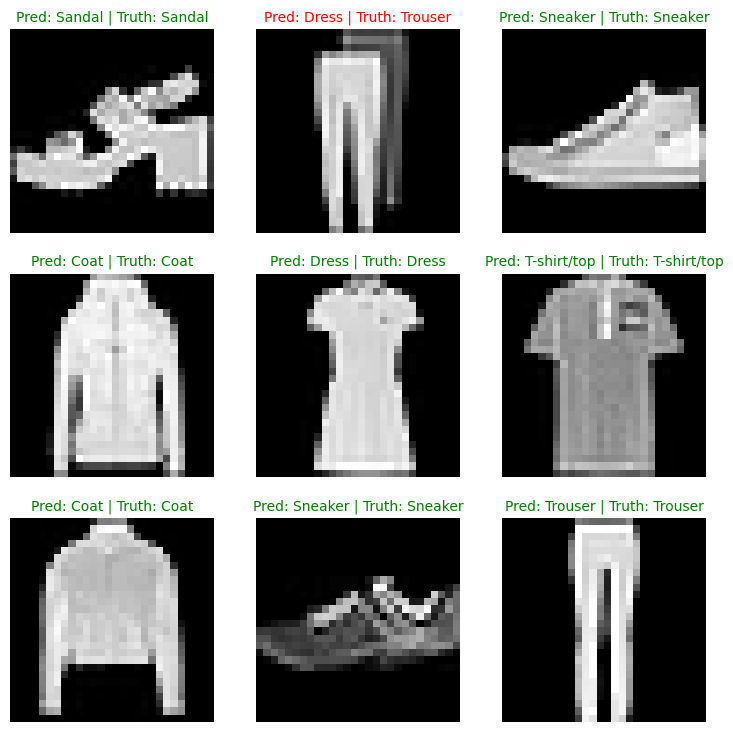

In [58]:
# Plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap = 'gray')

    # Find the prediction (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c = 'g') # Green text if prediction same as truth
    else:
        plt.title(title_text, fontsize = 10, c = 'r')
    
    plt.axis(False);

## 10. Making A Confusion Matrix or Further Prediction Evaluation:

A confusion matrix is a fantastic way of evaluating your classification models visually:
https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt/github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [60]:
# Import tqmd.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = 'Making predictions...'):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
    
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:02<00:00, 122.20it/s]


tensor([9, 2, 1,  ..., 8, 1, 7])

In [61]:
len(y_pred_tensor)

10000

In [63]:
import mlxtend

In [70]:
# See if required packages are installed, and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0..0 or higher'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.24.0


In [72]:
import mlxtend
print(mlxtend.__version__)

0.24.0


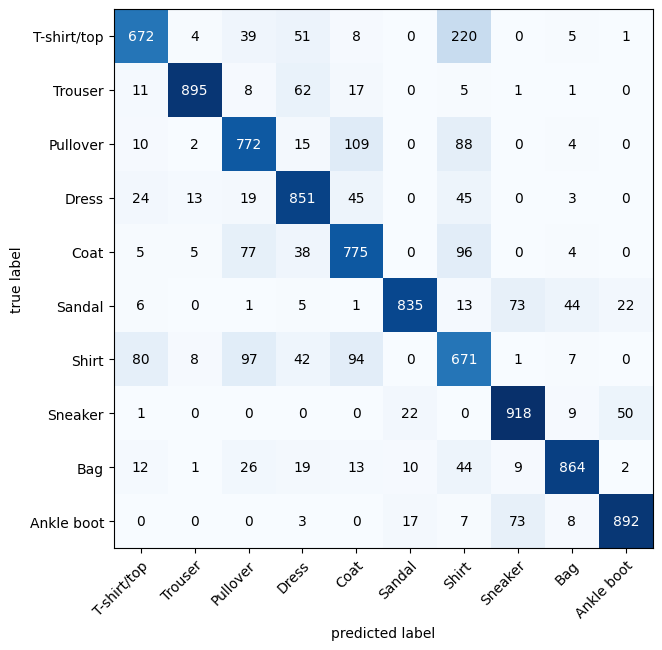

In [77]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Set up confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task = 'multiclass', num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10, 7)
)

In [76]:
confmat_tensor

tensor([[672,   4,  39,  51,   8,   0, 220,   0,   5,   1],
        [ 11, 895,   8,  62,  17,   0,   5,   1,   1,   0],
        [ 10,   2, 772,  15, 109,   0,  88,   0,   4,   0],
        [ 24,  13,  19, 851,  45,   0,  45,   0,   3,   0],
        [  5,   5,  77,  38, 775,   0,  96,   0,   4,   0],
        [  6,   0,   1,   5,   1, 835,  13,  73,  44,  22],
        [ 80,   8,  97,  42,  94,   0, 671,   1,   7,   0],
        [  1,   0,   0,   0,   0,  22,   0, 918,   9,  50],
        [ 12,   1,  26,  19,  13,  10,  44,   9, 864,   2],
        [  0,   0,   0,   3,   0,  17,   7,  73,   8, 892]])

## 11. Save And Load Best Performing Model:

In [79]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save path
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [80]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [81]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30595260858535767,
 'model_acc': 89.03753993610223}

In [82]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

100%|██████████| 313/313 [00:01<00:00, 190.84it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30595260858535767,
 'model_acc': 89.03753993610223}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)

## Exercises:

* https://learnpytorch.io/03_pytorch_computer_vision/#exercises